#### (a)Take grayscale image of size 512x512, apply average and median spatial filters with 5x5 mask & observe their performance for noise suppression in term of PSNR

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

### Loading the original image

shape of the image: (688, 688)


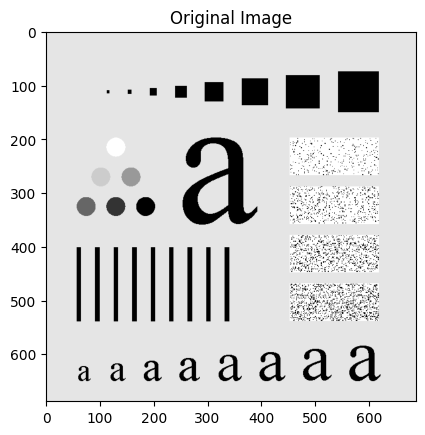

min pixel intensity: 0
max pixel intensity: 255


In [2]:
original_image= cv2.imread('./images/Characters_Test_Pattern.tif',0)
print(f'shape of the image: {original_image.shape}')
plt.imshow(original_image,cmap='gray')
plt.title('Original Image')
plt.show()

img_arr = np.array(original_image)
print(f"min pixel intensity: {np.min(img_arr)}")
print(f"max pixel intensity: {np.max(img_arr)}")

### PSNR(peak signal to noise ratio) function

In [3]:
def cal_psnr(actual_image, distored_image):
    actual_image = np.float64(actual_image)
    distored_image = np.float64(distored_image)
    mse = np.mean((actual_image - distored_image)**2) #MSE ERROR
    if mse == 0:
        mse = int('inf')
    max_pixel = 255.0
    psnr_val = 10*np.log10((max_pixel*max_pixel)/(mse))
    
    return psnr_val
        
        
        

### Function for salt(white pixel) and pepper(black pixel) noise

In [4]:
def add_salt_and_peeper_noise(image,prob):
    noisy_image = image.copy()
    rows, cols = image.shape
    
    #add salt noise(white pixels)
    num_salt = int(prob*rows*cols/2)
    salt_coords = [np.random.randint(0,rows,num_salt), np.random.randint(0,cols,num_salt)] #np.random.randint(start,end,num_of_random_points)
    noisy_image[salt_coords[0],salt_coords[1]] = 255
    
    #add pepper noise(black piexel)
    num_pepper = int(prob*rows*cols/2)
    pepper_coords = [np.random.randint(0,rows,num_pepper), np.random.randint(0,cols,num_pepper)]
    noisy_image[pepper_coords[0],pepper_coords[1]] = 0
    
    return noisy_image
    
    
    

### Function for averaging filter

In [5]:
def averaging_filter(image, mask_size):
    height, width = image.shape
    filtered_image = np.zeros_like(image, dtype=np.float64)
    pad = mask_size // 2
    
    #apply the averaging filter to each pizel in the image
    for i in range(height):
        for j in range(width):
            pixel_sum, count = 0, 0
            #loop through the neighborhood defined by the mask size
            for x in range(-pad, pad+1):
                for y in range(-pad, pad+1):
                    neighbor_i, neighbor_j = i+x, j+y
                    #check if the neighbor pixel is within bounds of the image
                    if 0<=neighbor_i<height and 0<=neighbor_j<width:
                        pixel_sum += image[neighbor_i, neighbor_j]
                        count+=1
            filtered_image[i,j] = pixel_sum/count
            
    return np.uint8(filtered_image)        
            
                        

### Function for Median filtering

In [6]:
def median_filter(image, mask_size):
    height, width = image.shape
    filtered_image = np.zeros_like(image, dtype=np.float64)
    pad = mask_size//2 #half of the mask size
    
    #Apply the median filter to each pixel in the image
    for i in range(height):
        for j in range(width):
            neighborhood = [] # for storing neighborhood pixel values
            for x in range(-pad, pad+1):
                for y in range(-pad, pad+1):
                    neighbor_i, neighbor_j = i+x, j+y
                    if 0<=neighbor_i<height and 0<=neighbor_j<width:
                        neighborhood.append(image[neighbor_i,neighbor_j])
                        
            #find the median value of the neighborhood
            filtered_image[i,j] = np.median(neighborhood)
    return np.uint8(filtered_image)                    
            
    
    

### Adding 25% salt and pepper noise

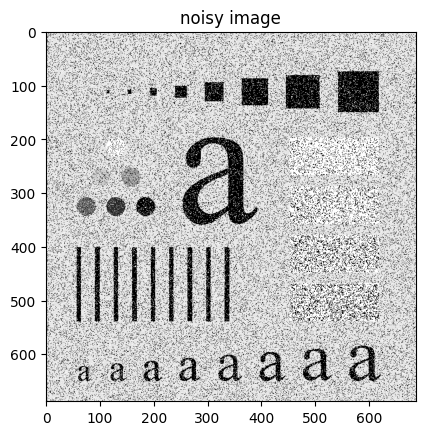

PSNR = 10.084109017277578 dB


In [7]:
noise_probability = 0.25 # 25% noise(25*(1/2)slat_noise + 25*(1/2)pepper_noise)
noisy_image = add_salt_and_peeper_noise(original_image,noise_probability)

plt.imshow(noisy_image,cmap='gray')
plt.title('noisy image')
plt.show()

psnr = cal_psnr(original_image, noisy_image)
print(f"PSNR = {psnr} dB")

### Applying the Averaging filter

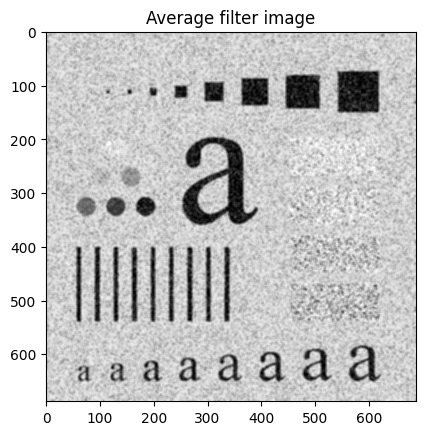

PSNR = 15.649305074792977 dB


In [8]:
#built-in function of open cv
kernel = np.ones((5,5),dtype=np.float64)/(5*5) #kernel size = 5*5
averaging_filter_image = cv2.filter2D(noisy_image,-1,kernel)

plt.imshow(averaging_filter_image, cmap='gray')
plt.title('Average filter image')
plt.show()

psnr = cal_psnr(original_image, averaging_filter_image)
print(f"PSNR = {psnr} dB")

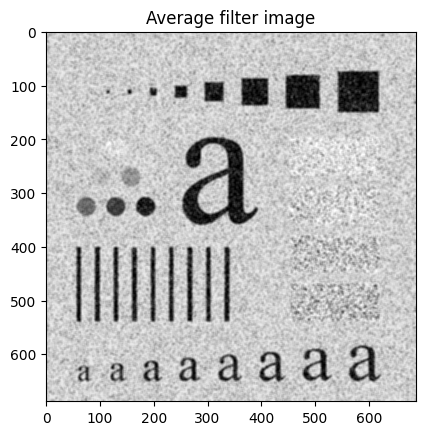

PSNR = 15.603014566067941 dB


In [9]:
averaging_filter_image = averaging_filter(noisy_image,5)

plt.imshow(averaging_filter_image, cmap='gray')
plt.title('Average filter image')
plt.show()

psnr = cal_psnr(original_image, averaging_filter_image)
print(f"PSNR = {psnr} dB")

### Applying the Median filter

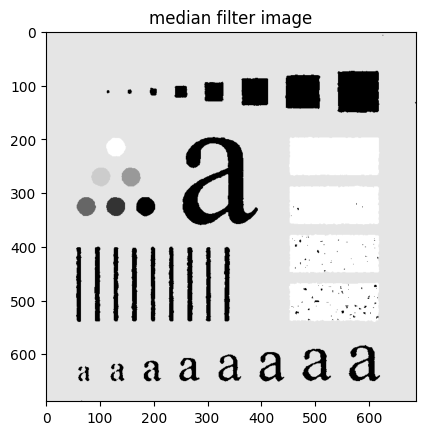

PSNR = 18.139240842954216 dB


In [10]:
#built-in function of open cv
median_filter_image = cv2.medianBlur(noisy_image, 5) # 5 is the kernel/filter size

plt.imshow(median_filter_image, cmap='gray')
plt.title('median filter image')
plt.show()

psnr = cal_psnr(original_image, median_filter_image)
print(f"PSNR = {psnr} dB")

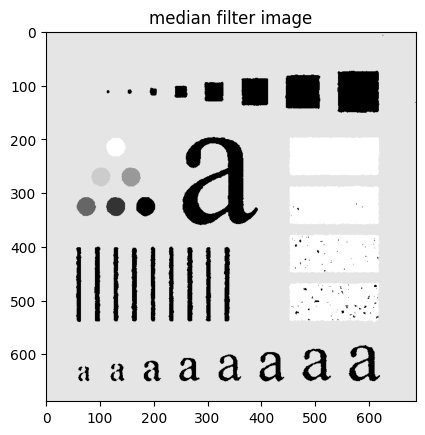

PSNR = 18.141054193496643 dB


In [11]:
median_filter_image = median_filter(noisy_image,5)

plt.imshow(median_filter_image, cmap='gray')
plt.title('median filter image')
plt.show()

psnr = cal_psnr(original_image, median_filter_image)
print(f"PSNR = {psnr} dB")

### Loading the noisy image

shape of the image: (440, 455)


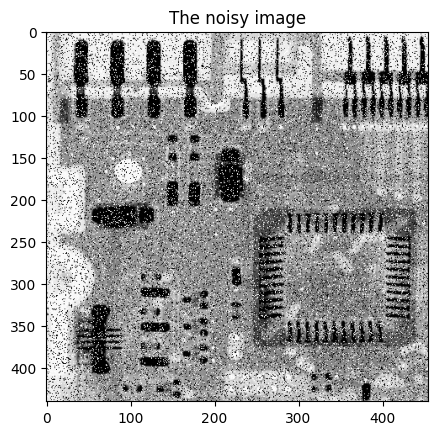

min pixel intensity: 0
max pixel intensity: 255


In [12]:
noisy_image2 = cv2.imread('./images/Noisy_PCB.tif',0)
print(f'shape of the image: {noisy_image2.shape}')
plt.imshow(noisy_image2,cmap='gray')
plt.title('The noisy image')
plt.show()

img_arr = np.array(noisy_image2)
print(f"min pixel intensity: {np.min(img_arr)}")
print(f"max pixel intensity: {np.max(img_arr)}")

### Applying averaging filter

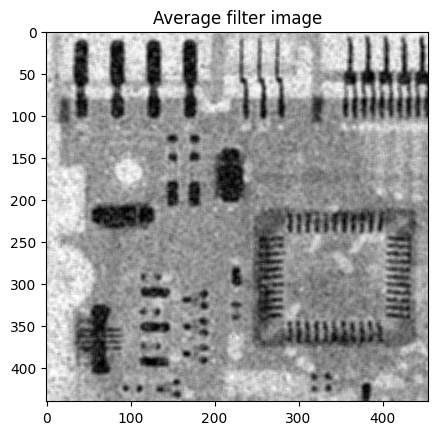

In [13]:
#built-in function of open cv
kernel = np.ones((5,5),dtype=np.float64)/(5*5) #kernel size = 5*5
averaging_filter_image = cv2.filter2D(noisy_image2,-1,kernel)

plt.imshow(averaging_filter_image, cmap='gray')
plt.title('Average filter image')
plt.show()


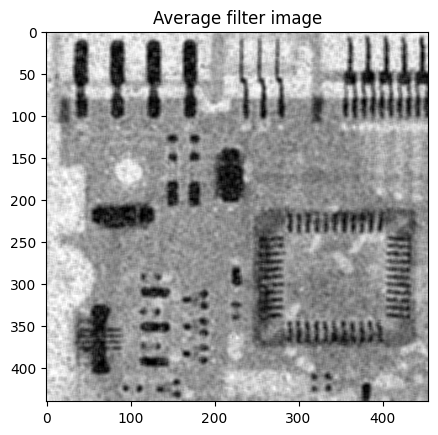

In [14]:
averaging_filter_image = averaging_filter(noisy_image2,5)

plt.imshow(averaging_filter_image, cmap='gray')
plt.title('Average filter image')
plt.show()

### Applying median filter

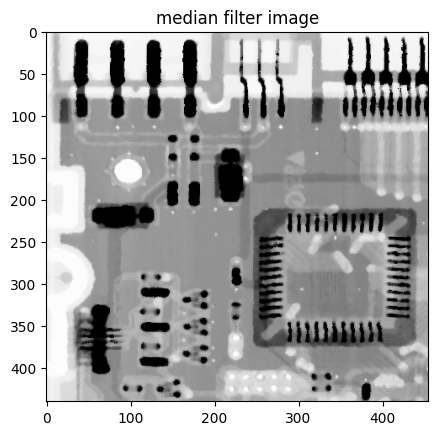

In [15]:
#built-in function of open cv
median_filter_image = cv2.medianBlur(noisy_image2, 5) # 5 is the kernel/filter size

plt.imshow(median_filter_image, cmap='gray')
plt.title('median filter image')
plt.show()

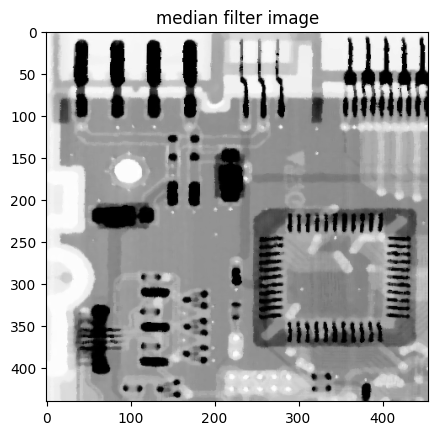

In [16]:
median_filter_image = median_filter(noisy_image2,5)

plt.imshow(median_filter_image, cmap='gray')
plt.title('median filter image')
plt.show()